# Mega-Sena Analyse

*Henrique David de Medeiros*

A Mega-Sena é uma das maiores modalidades de jogos de loteria do Brasil. O sorteio é realizado pelo menos duas vezes na semana,
além de haver o prêmio principal, o qual o apostador que acertar 6 (seis) números pode levar para casa milhões de reais, o apostador ainda pode receber quantias menores, acertando 4 (quatro) ou 5 (cinco) números.

Os números da aposta, chamado popularmente de jogo, pode ser formado tanto pelo jogador, quanto por um sistema, o qual gera números aleatórios, chamado de "Surpresinha".

O prêmio corresponde a 45,3% da arrecadação do sorteio. Dessa porcentagem ocorre a seguinte distribuição:
                - 35% são distribuídos entre o(s) acertador(es) da Sena, 
                - 19% da Quina e
                - 19% da Quadra,
                - 22% são distribuídos nos concursos de final 0 e 5,
                - 5% para os últimos concursos do ano de final 0 ou 5, 
                - e outra parte do valor é repassado para o Governo Federal.
                
Caso não haja vencedor, o prêmio é acumulado para o próximo sorteio. Caso haja vencedor e não busque o valor em 90 dias do sorteio, o valor é repassado ao tesouro nacional para aplicação no FIES - Fundo de Financiamento ao Estudante do Ensino Superior.

A seguir analisemos os dados da Mega-Sena, de 03/1996 a 03/2018.

Os dados são apresentados com as seguintes colunas:
    1. id
    2. Concurso
    3. Dezena1
    4. Dezena2
    5. Dezena3
    6. Dezena4
    7. Dezena5
    8. Dezena6
    9. Arrecadação Total
    10. Ganhadores da Sena
    11. Rateio da Sena
    12. Ganhadores da Quina
    13. Rateio da Quina
    14. Ganhadores da Quadra
    15. Rateio da Quadra
    16. Acumulação
    17. Valor Acumulado
    18. Estimativa do Prêmio
    
A seguir é apresentada uma tabela com os 5 primeiros concursos realizados.

In [2]:
# Importar o database e importar o pandas e o matplotlib
import pandas as pd
import matplotlib.pyplot as plt
arquivo = 'basedados.xlsx'
excel = pd.ExcelFile(arquivo)
print(excel.sheet_names)
dados = excel.parse(0)
dados.head()

['MegaSena']


,Concurso,Data Sorteio,Dezena1,Dezena2,Dezena3,Dezena4,Dezena5,Dezena6,Arrecadacao_Total,Ganhadores_Sena,Rateio_Sena,Ganhadores_Quina,Rateio_Quina,Ganhadores_Quadra,Rateio_Quadra,Acumulado,Valor_Acumulado,Estimativa_Prêmio
0,1,1996-03-11,41,5,4,52,30,33,0.0,0,0.00,17,39158.92,2016,330.21,SIM,1714650.23,0
1,2,1996-03-18,9,39,37,49,43,41,0.0,1,2307162.23,65,14424.02,4488,208.91,NÃO,0.00,0
2,3,1996-03-25,36,30,10,11,29,47,0.0,2,391192.51,62,10515.93,4261,153.01,NÃO,0.00,0
3,4,1996-04-01,6,59,42,27,1,5,0.0,0,0.00,39,15322.24,3311,180.48,SIM,717080.75,0
4,5,1996-04-08,1,19,46,6,16,2,0.0,0,0.00,98,5318.10,5399,96.53,SIM,1342488.85,0


In [3]:
# Gera o prêmio máximo da Sena obtido pela equação Prêmio = Ganhadores_Sena x Rateio_Sena e
# insere em uma tabela no banco de dados.
dados['premio_maximo'] = dados.Ganhadores_Sena * dados.Rateio_Sena

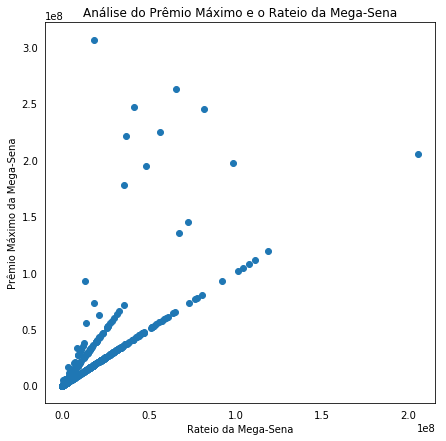

In [6]:
# Separa as colunas que serão utilizadas no primeiro gráfico.
cols_analise = ['Rateio_Sena','premio_maximo', 'Arrecadacao_Total', 'Estimativa_Prêmio']
comparacao_valor_total = dados[cols_analise]

# Gera o axis e a imagem.
fig_cmp, ax0 = plt.subplots(figsize = (7,7))

# Gera gráfico do tipo Scatter com os dados da Rateio e o Prêmio Máximo da Sena
ax0.scatter(x = comparacao_valor_total['Rateio_Sena'], y = comparacao_valor_total['premio_maximo'])
# Configura o titulo da posição de x.
ax0.set_xlabel('Rateio da Mega-Sena')
# Configura o titulo da posição de y.
ax0.set_ylabel('Prêmio Máximo da Mega-Sena')
# Insere o título do gráfico.
ax0.set_title("Análise do Prêmio Máximo e o Rateio da Mega-Sena")
# Remove ticks para melhorar a visualização, possibilitando um visual mais 'clean'.
ax0.tick_params( bottom = False , left = False)

No gráfico acima, é possível realizar uma comparação quanto aos valores dos Rateios e do Prêmio Máximo da Mega-Sena. Realizando uma análise no gráfico é possível perceber uma linearidade quanto aos valores, e que o valor do prêmio não é proporcional ao do rateio. Como exemplo podemos analisar que enquanto alguns rateios estão abaixo de 0.5 e o prêmio máximo possui valor maior que 0.5, considerando a escala 1e8.

É possível analisar, também, que o prêmio de maior valor da Sena  possui valor menor que 0.5, e possivelmente abaixo de 0.25,e que o ponto de maior rasteio (localizado em 2.0, aproximadamente) possui um valor o qual pode ser considerado maior que a média da escala utilizada, porém menor que a média dos dados.

AttributeError: 'numpy.ndarray' object has no attribute 'spines'

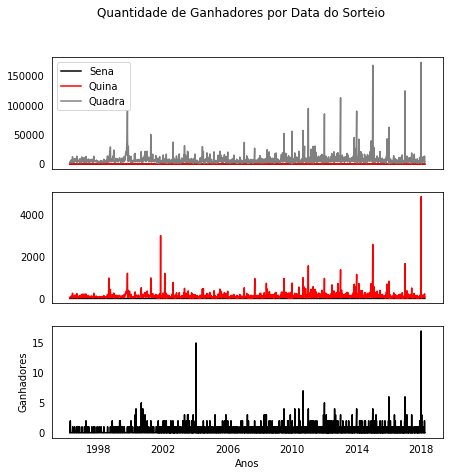

In [17]:
%matplotlib inline
# Separa as colunas que serão utilizadas no próximo gráfico.
cols = ['Data Sorteio', 'Ganhadores_Sena', 'Ganhadores_Quina', 'Ganhadores_Quadra']
ganhadores_pano = dados[cols]

# Gera a figura e o axis que serão utilizados para geração do gráfico.
fig, axes = plt.subplots(nrows=3, ncols=1, sharex=True, figsize = (7,7));

fig.suptitle("Quantidade de Ganhadores por Data do Sorteio")

# Gera gráfico com os 3 tipos de sorteios (Sena, Quina e Quadra) e compara a quantidade de vencedores durante os anos.
axes[0].plot(ganhadores_pano['Data Sorteio'], ganhadores_pano['Ganhadores_Sena'], c='black', label= 'Sena')
axes[0].plot(ganhadores_pano['Data Sorteio'], ganhadores_pano['Ganhadores_Quina'], c='red', label= 'Quina' )
axes[0].plot(ganhadores_pano['Data Sorteio'], ganhadores_pano['Ganhadores_Quadra'], c='grey', label= 'Quadra' )
# Informa a localização da legenda.
axes[0].legend(loc='upper left')
# Informa os nomes para as posições x e y..
# Remove ticks.
axes[0].tick_params( bottom = False, left = False )


# Gera o gráfico com apenas os dados da Quina e da Sena
axes[1].plot( ganhadores_pano['Data Sorteio'], ganhadores_pano['Ganhadores_Sena'], c='black', label= 'Sena' )
axes[1].plot( ganhadores_pano['Data Sorteio'], ganhadores_pano['Ganhadores_Quina'], c='red', label= 'Quina' )
# Infoma os significados de x e y.
# Remove ticks.
axes[1].tick_params( bottom = False, left = False )

# Gera o gráfico com apenas os dados da Sena
axes[2].plot( ganhadores_pano['Data Sorteio'], ganhadores_pano['Ganhadores_Sena'], c='black', label= 'Sena' )
# Infoma os significados de x e y.
axes[2].set_xlabel('Anos');
axes[2].set_ylabel('Ganhadores');
# Remove ticks.
axes[2].tick_params( bottom = False, left = False )

axes[1].tick_params( bottom = False, left = False)

# Ajusta o espaçamento entre os gráficos.
plt.subplots_adjust( wspace = 0.30 , left = 0.01, hspace = 0.3)


# A solução poderia ser via for com range(0,3), porém é realizada comparações entre os sorteios, o qual torna dificil fazer
# a leitura do gráfico, assim foi estudado cada gráfico separadamente.

No gráfico, Quantidade de Ganhadores por Tipo de Sorteio, a esquerda é possível comparar os tipos de modalidades de sorteio em quantidade de ganhadores por ano. Claramente é possível perceber que para uma pessoa ser ganhadora na *Quadra* é muito mais fácil do que na *Sena* e na *Quina* atualmente. Enquanto na direita é possível perceber que entre a *Sena* e a *Quina*, a quantidade de vencedores ainda é bem superior a *Sena* com o passar dos anos.

Suponha que um cientista descobriu a viagem no tempo e foi atrás de um analista de dados para saber qual foi o ano que teve mais ganhadores na Quina, pois ele queria jogar durante o ano todos os jogos, já que ele achava a Sena muito difícil. Então, o analista dise que ele deveria voltar para 2017, porque foi o ano em que teve maior número de ganhadores, o qual ele poderia ser um deles. E o cientista não precisava se garantir apenas na Quina já que no mesmo período, a Quadra se mostrava com a maior quantidade de jogadores dos 3 sorteios possíveis. 

Além da quantidade de ganhadores, é possível analisar que durante o período de 2002 e 2010, tanto a Quina quanto a Quarta apresentaram queda na quantidade de ganhadores.

No gráfico logo abaixo do primeiro temos a quantidade de ganhadores da Sena com o passar do tempo. É interesante notar como é díficil haver um ganhador comparando com a Quina e a Quadra. O número máximo de ganhadores foi no ano de 2018 e o segundo maior foi no período de 2004. Analisando todos os outros anos é possível notar que segue um padrão, por mais que não seja constante, porém a quantidade de ganhadores são parecidos.

C:\Users\Henrique\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


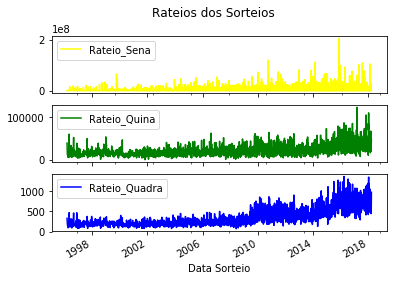

In [19]:
# Seleciona as colunas que serão utilizadas no próximo gráfico.
cols1 = ['Data Sorteio', 'Rateio_Sena', 'Rateio_Quina', 'Rateio_Quadra']
rateios = dados[cols1]

# Gera gráfico do tipo linha com os dados da data do sorteio e os rateios dos 3 sorteios.
rateios.plot(kind='line',x='Data Sorteio',y=['Rateio_Sena', 'Rateio_Quina', 'Rateio_Quadra'],
                    title='Rateios dos Sorteios', color=['yellow','green', 'blue'], subplots= True )
plt.legend(loc='best')
plt.show()


A Mega-Sena é o sorteio com maior valor de rasteio em comparação com a Quina e a Quadra como é possível analisar pelo gráfico gerado acima. É possível analisar que o rasteio vem crescendo a cada ano, porém a partir de 2011 a Sena começou a apresentar rasteio máximo aproximadamente iguais em comparações com 5 anos posteriores e que em 2016 foi o ano em que a Mega-Sena obteve o maior valor de rasteio.

O rasteio da Sena apresentou uma queda durante e após o ano de 2000, no qual só teve queda durante um período, porém desde o período de 2002, o rasteio só fez crescer de forma que em algum momento durante os anos, a sena chegue em um valor alto de rasteio.

Analisando o Rateio da Quadra é possível perceber que entre ela, o da Sena e da Quina, ela vem crescendo a cada ano, porém ela representa um valor muito mais baixo em comparação com as outras duas.

Em todos os sorteios, de 2001 a 2010, o valor do rateio era baixo em comparação com 2010 em diante.

